In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pickle 

import pandas as pd
import math

In [3]:
runtimes = {}

with open("./bin/runtimes.log") as f:
    lines = f.readlines()
    for l in lines:
        a = l.split(" ")
        n = a[2]
        if not n in runtimes.keys():
            runtimes[n] = []
        timeTaken = a[5]
        runtimes[n] += [float(timeTaken)]
    


with open("./bin/runtimes.pkl" , "wb") as f:
    pickle.dump(runtimes , f )

with open("./bin/runtimes.pkl", "rb") as f:
    r = pickle.load(f)

In [4]:
r_d = pd.DataFrame.from_dict(r)
r_df = r_d.iloc[: , 2:]
means = r_df.mean()

variance = ((r_df - means)**2).sum()

std_dev = variance ** (1/2)

In [5]:
meansx = pd.to_numeric(means.keys().to_numpy())
meansy = pd.to_numeric(means.to_numpy())

In [6]:
nlogn = means * np.log2(means)

tbynlogn = means / nlogn

tbynlognx = pd.to_numeric(tbynlogn.keys().to_numpy())
tbynlogny = pd.to_numeric(tbynlogn.to_numpy())

## Runtime

In [7]:
tbynlognxscripted = [ f"$2^{{ {int(math.log2(i))} }}$" for i in (tbynlognx) ]
meansxscripted = [ f"$2^{{ {int(math.log2(i))} }}$" for i in (meansx) ]

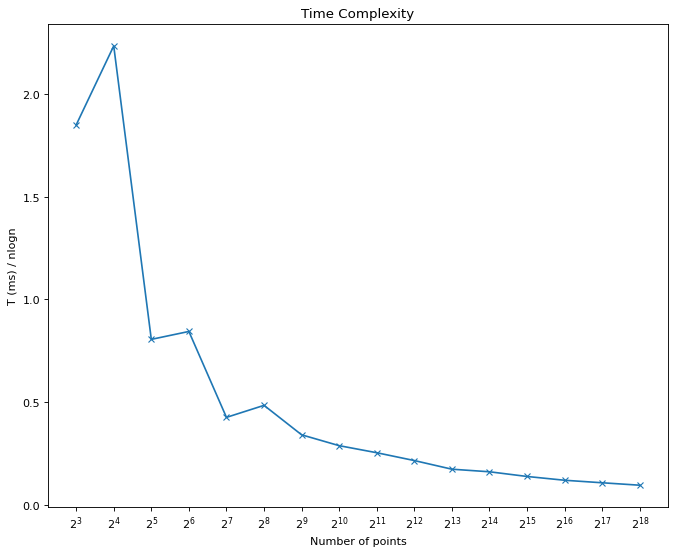

In [8]:
plt.figure(figsize=(10, 8), dpi=80)
plt.title("Time Complexity")
# plt.xlabel("$2^{21}$")
plt.xlabel(f"Number of points")
plt.ylabel("T (ms) / nlogn")

plt.plot(tbynlognxscripted , tbynlogny, marker = "x")
# plt.xticks(tbynlognxscripted.astype(str), rotation='45')
plt.savefig("./pics/Tbyn.png",bbox_inches='tight', dpi=150)

x = 2

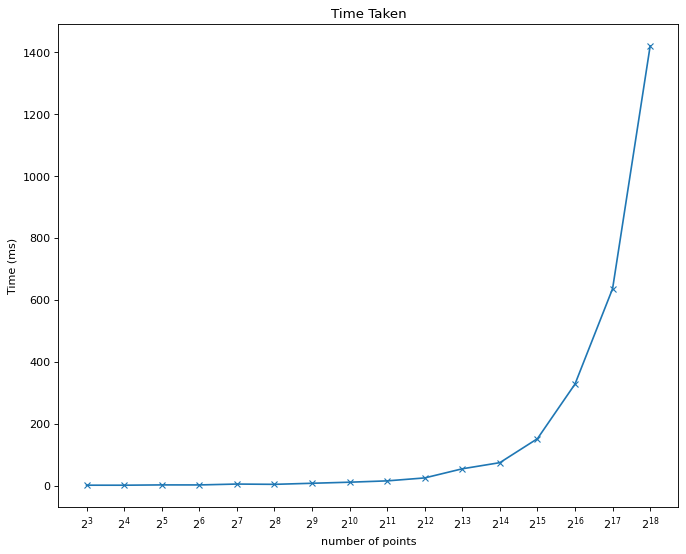

In [9]:
plt.figure(figsize=(10, 8), dpi=80)
plt.title("Time Taken")
plt.xlabel("number of points")
plt.ylabel("Time (ms)")

plt.plot(meansxscripted , meansy, marker = "x")
# plt.xticks(meansx.astype(str), rotation='45')
plt.savefig("./pics/timetaken.png",bbox_inches='tight', dpi=150)
x=2